# Python Packages

In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
import numpy as np
import pandas as pd
import numpy as np
from scipy import stats
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report
from sklearn.linear_model import LogisticRegression
import pandas.core.algorithms as algos
from pandas import Series
import scipy.stats.stats as stats
import re
import traceback
import string
%matplotlib inline

# Set Parameters

In [2]:
# Some parameters to use in the models later

testsize = 0.3
randomstate = 2020

param = {'max_depth': np.arange(3, 10),
         'criterion': ['gini', 'entropy'],
         'max_leaf_nodes': [5, 10, 20, 100],
         'min_samples_split': [2, 5, 10, 20]}



<b> Read the Data <b/>

In [3]:
# Loadind dataset to df
file = 'UCI_Credit_Card.csv'
df = pd.read_csv(file)

<b> Content <b/>

Dataset Information
This dataset contains information on default payments, demographic factors, credit data, history of payment, and bill statements of credit card clients in Taiwan from April 2005 to September 2005.
 


There are 25 variables:
- ID: ID of each client
- LIMIT_BAL: Amount of given credit in NT dollars (includes individual and family/supplementary credit
- SEX: Gender (1=male, 2=female)
- EDUCATION: (1=graduate school, 2=university, 3=high school, 4=others, 5=unknown, 6=unknown)
- MARRIAGE: Marital status (1=married, 2=single, 3=others)
- AGE: Age in years
- PAY_0: Repayment status in September, 2005 (-1=pay duly, 1=payment delay for one month, 2=payment delay for two - months, … 8=payment delay for eight months, 9=payment delay for nine months and above)
- PAY_2: Repayment status in August, 2005 (scale same as above)
- PAY_3: Repayment status in July, 2005 (scale same as above)
- PAY_4: Repayment status in June, 2005 (scale same as above)
- PAY_5: Repayment status in May, 2005 (scale same as above)
- PAY_6: Repayment status in April, 2005 (scale same as above)
- BILL_AMT1: Amount of bill statement in September, 2005 (NT dollar)
- BILL_AMT2: Amount of bill statement in August, 2005 (NT dollar)
- BILL_AMT3: Amount of bill statement in July, 2005 (NT dollar)
- BILL_AMT4: Amount of bill statement in June, 2005 (NT dollar)
- BILL_AMT5: Amount of bill statement in May, 2005 (NT dollar)
- BILL_AMT6: Amount of bill statement in April, 2005 (NT dollar)
- PAY_AMT1: Amount of previous payment in September, 2005 (NT dollar)
- PAY_AMT2: Amount of previous payment in August, 2005 (NT dollar)
- PAY_AMT3: Amount of previous payment in July, 2005 (NT dollar)
- PAY_AMT4: Amount of previous payment in June, 2005 (NT dollar)
- PAY_AMT5: Amount of previous payment in May, 2005 (NT dollar)
- PAY_AMT6: Amount of previous payment in April, 2005 (NT dollar)
- default.payment.next.month: Default payment (1=yes, 0=no)


# Data Wrangling

In [4]:
# Let's look at the first five rows of the data.

df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
0,1,20000.0,2,2,1,24,2,2,-1,-1,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,2,120000.0,2,2,2,26,-1,2,0,0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,3,90000.0,2,2,2,34,0,0,0,0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,4,50000.0,2,2,1,37,0,0,0,0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,5,50000.0,1,2,1,57,-1,0,-1,0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0


In [5]:
# Let's look into more details.

df.describe()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,...,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.00000,30000.000000,30000.000000,30000.000000,30000.000000
mean,15000.500000,167484.322667,1.603733,1.853133,1.551867,35.485500,-0.016700,-0.133767,-0.166200,-0.220667,...,43262.948967,40311.400967,38871.760400,5663.580500,5.921163e+03,5225.68150,4826.076867,4799.387633,5215.502567,0.221200
std,8660.398374,129747.661567,0.489129,0.790349,0.521970,9.217904,1.123802,1.197186,1.196868,1.169139,...,64332.856134,60797.155770,59554.107537,16563.280354,2.304087e+04,17606.96147,15666.159744,15278.305679,17777.465775,0.415062
min,1.000000,10000.000000,1.000000,0.000000,0.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,...,-170000.000000,-81334.000000,-339603.000000,0.000000,0.000000e+00,0.00000,0.000000,0.000000,0.000000,0.000000
25%,7500.750000,50000.000000,1.000000,1.000000,1.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,2326.750000,1763.000000,1256.000000,1000.000000,8.330000e+02,390.00000,296.000000,252.500000,117.750000,0.000000
50%,15000.500000,140000.000000,2.000000,2.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.000000,...,19052.000000,18104.500000,17071.000000,2100.000000,2.009000e+03,1800.00000,1500.000000,1500.000000,1500.000000,0.000000
75%,22500.250000,240000.000000,2.000000,2.000000,2.000000,41.000000,0.000000,0.000000,0.000000,0.000000,...,54506.000000,50190.500000,49198.250000,5006.000000,5.000000e+03,4505.00000,4013.250000,4031.500000,4000.000000,0.000000
max,30000.000000,1000000.000000,2.000000,6.000000,3.000000,79.000000,8.000000,8.000000,8.000000,8.000000,...,891586.000000,927171.000000,961664.000000,873552.000000,1.684259e+06,896040.00000,621000.000000,426529.000000,528666.000000,1.000000


<p><i> There are 30,000 bank clients' data in this dataset.<p/> <p> There are more women clients than men. <p/> <p> Average credit card limit is 167,484. <p/> Most of the clients are collage educated. <p/> <p> Most of the client are married. <p/> <p> Average age of the clients is 35.5 and standard deviation is 9.21.<p/>

__Checking Missing Data__


In [6]:
# Let's check if there is missing data

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
ID                            30000 non-null int64
LIMIT_BAL                     30000 non-null float64
SEX                           30000 non-null int64
EDUCATION                     30000 non-null int64
MARRIAGE                      30000 non-null int64
AGE                           30000 non-null int64
PAY_0                         30000 non-null int64
PAY_2                         30000 non-null int64
PAY_3                         30000 non-null int64
PAY_4                         30000 non-null int64
PAY_5                         30000 non-null int64
PAY_6                         30000 non-null int64
BILL_AMT1                     30000 non-null float64
BILL_AMT2                     30000 non-null float64
BILL_AMT3                     30000 non-null float64
BILL_AMT4                     30000 non-null float64
BILL_AMT5                     30000 non-null float64
BILL_AMT6   

*It seems that there is not any missing data, dataset has 3000 rows and 25 categories(columns), and all is non-null*

# Data Exploration

__Credit Card Limit vs. Default Payment__

Let's check if there is a correlation between credit card limit and Default Payment.

In [7]:
# First let's explore credit card limits a little.

df['LIMIT_BAL'].value_counts().head(5)

50000.0     3365
20000.0     1976
30000.0     1610
80000.0     1567
200000.0    1528
Name: LIMIT_BAL, dtype: int64

_<p>There are 81 different credit card limit values and most of the clients have 50,000 limits (3365 people).<p/>_

_<p>We can see the density plot below:

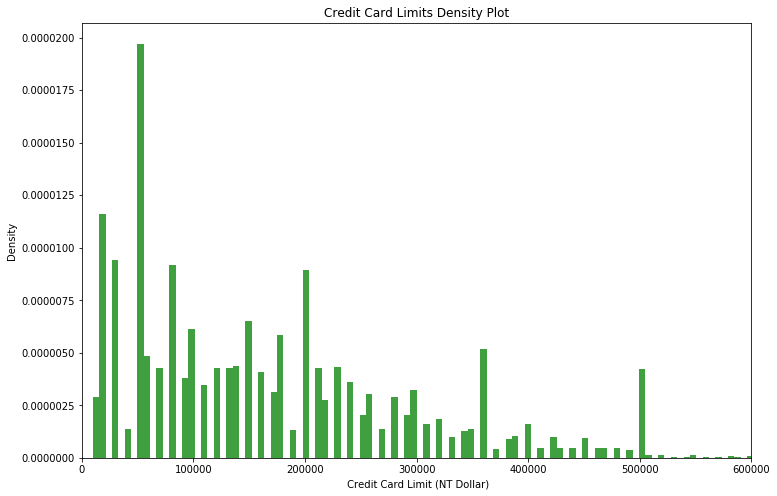

In [8]:
plt.figure(figsize=(12, 8))
plt.title('Credit Card Limits Density Plot')
plt.xlabel(' Credit Card Limit (NT Dollar)')
plt.ylabel('Density')
plt.xlim([0, 600000])
plt.hist(df['LIMIT_BAL'], bins=174, density=True,
         color='green', histtype='stepfilled', alpha=0.75)
plt.show()

_Below plot verifies that 50,000 is the most frequent limit among the clients._ _It has the most density, followed by 20,000 ( 1976 people), 30,000 (1610 people) and 80,000 (1567 people)._

Let's see compare the default payment next month by credit card limits:

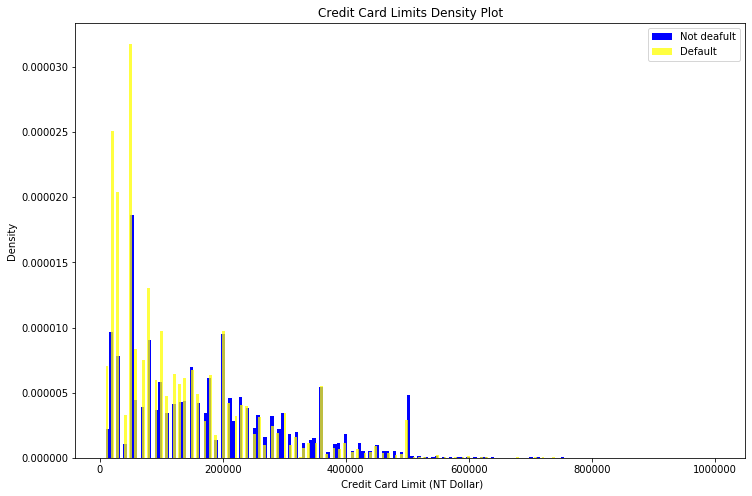

In [9]:
non_default = df.loc[df['default.payment.next.month'] == 0]['LIMIT_BAL']
default = df.loc[df['default.payment.next.month'] == 1]['LIMIT_BAL']

# We can plot these two group and see the correlation between credit card limit and default payment.

plt.figure(figsize=(12, 8))
plt.title('Credit Card Limits Density Plot')
plt.xlabel(' Credit Card Limit (NT Dollar)')
plt.ylabel('Density')
plt.hist(non_default, bins=174, density=True,
         color='blue', alpha=1, label='Not default')
plt.hist(default, bins=174, density=True,
         color='yellow', alpha=0.75, label='Default')
plt.legend(['Not deafult', 'Default'])
plt.show()

_As above plot shows that most defaults lays on credit card limits from 0 to 200,000. Most defaults are on 50,000._

__Sex vs. Credit Limit__

Let's check if sex of the clients plays any role on default payment. We can start with total number of males and females first.

<p> Remember Male=1, Female=2 <p/>

In [10]:
# Female to Male Ratio

df.SEX.value_counts()/len(df.SEX)

2    0.603733
1    0.396267
Name: SEX, dtype: float64

60% of the clients are female, 40% of them are male. We can check limit distribution for sex of the clients.

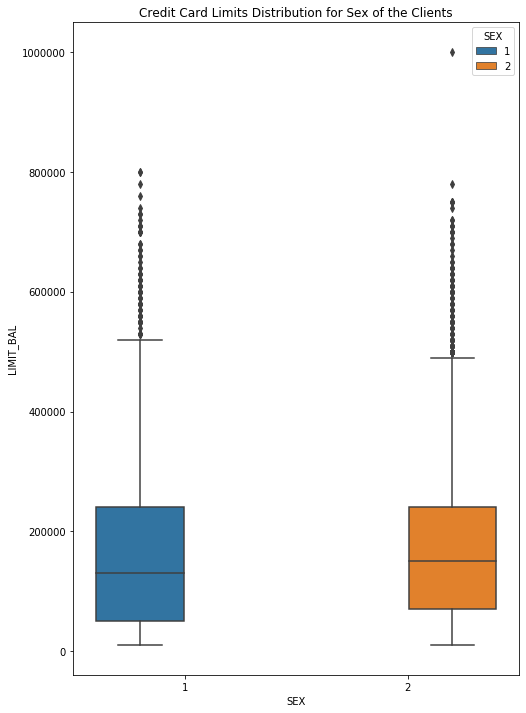

In [11]:
plt.figure(figsize=(8, 12))
plt.title('Credit Card Limits Distribution for Sex of the Clients')
sns.boxplot(x="SEX", y="LIMIT_BAL", data=df, hue='SEX')
plt.show()

<p>Credit Card Limit is pretty similar between sexes. Female have a little higher mean and also higher outlier (1 Million NT Dollar). <p/>

<p> Male have slightly bigger IQR, Q3 and Q4. However male's Q1 is smaller than female ones.  

__Sex vs Default Payment__

Which sex do default more payments? Is there any correlation between them? Let's answer these questions!

<p> Let's visualize the density plot for sex grouped by default payment next month.<p/>


In [12]:
male = df.loc[df.SEX == 1]["default.payment.next.month"].value_counts()
female = df.loc[df.SEX == 2]["default.payment.next.month"].value_counts()
male

0    9015
1    2873
Name: default.payment.next.month, dtype: int64

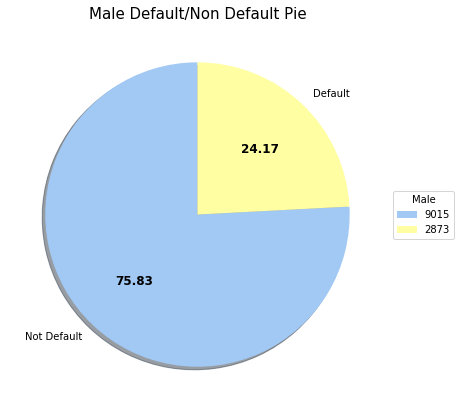

In [13]:
label = ['Not Default', 'Default']
sns.set_color_codes(palette='pastel')
colors = ('b', 'y')
wp = {'linewidth': 1, 'edgecolor': "green"}
fig, ax = plt.subplots(figsize=(10, 7))
wedges, texts, autotexts = ax.pie(male,
                                  autopct='%.2f',
                                  labels=label,
                                  colors=colors,
                                  shadow=True,
                                  startangle=90,
                                  )

ax.legend(wedges, male,
          title="Male",
          loc="center left",
          bbox_to_anchor=(1, 0, 0.5, 1))

plt.setp(autotexts, size=12, weight="bold")
ax.set_title("Male Default/Non Default Pie", size=15)

plt.show()

75% of the male clients make their next payment, 25% of them default the next payment.

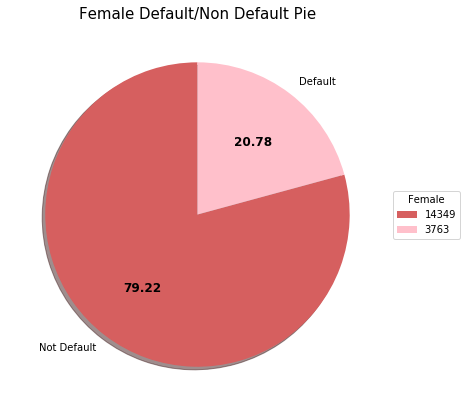

In [14]:
label = ['Not Default', 'Default']
sns.set_color_codes(palette='muted')
colors = ('r', 'pink')
wp = {'linewidth': 1, 'edgecolor': "green"}
fig, ax = plt.subplots(figsize=(10, 7))
wedges, texts, autotexts = ax.pie(female,
                                  autopct='%.2f',
                                  labels=label,
                                  colors=colors,
                                  shadow=True,
                                  startangle=90,
                                  )

ax.legend(wedges, female,
          title="Female",
          loc="center left",
          bbox_to_anchor=(1, 0, 0.5, 1))

plt.setp(autotexts, size=12, weight="bold")
ax.set_title("Female Default/Non Default Pie", size=15)

plt.show()

80% of the female clients make their next payment, 20% of them default the next payment.

__Multiple Variable Comperison__

Let's show distribution between more than two features at the same time. Before doing that, we need to do some cleaning.

Let's start with MARRIAGE column. There are 3 categories documented for MARRIAGE column. <p> MARRIAGE: Marital status (1=married, 2=single, 3=others)<p/> <p> However, if we look into the columns, there is another category as __0__ which is not documented. We can add this __0__ to __3=others__ since it will make more sense for our analysis. 

In [15]:
# check the catogories of MARRIAGE again
df.MARRIAGE.value_counts()

2    15964
1    13659
3      323
0       54
Name: MARRIAGE, dtype: int64

In [16]:
# We will add category 0 to category 3

df.loc[df.MARRIAGE == 0, 'MARRIAGE'] = 3

# Now, we have only 3 categories.
df.MARRIAGE.value_counts()

2    15964
1    13659
3      377
Name: MARRIAGE, dtype: int64

Let's check EDUCATION category as well. We have 6 documented and 1 undocumented categories for EDUCATION, I think we should add categories __0, 5 and 6__ to __4__, thus we can have separate categories for clients who went to grad school, college (university) and high school. Rest is combined to 4=others.

<p>EDUCATION: (1=graduate school, 2=university, 3=high school, 4=others, 5=unknown, 6=unknown)<p/>

In [17]:
# Original EDUCATION categories
df.EDUCATION.value_counts()

2    14030
1    10585
3     4917
5      280
4      123
6       51
0       14
Name: EDUCATION, dtype: int64

In [18]:
edu = (df.EDUCATION == 0) | (df.EDUCATION == 5) | (df.EDUCATION == 6)
df.loc[edu, 'EDUCATION'] = 4

# Revised EDUCATION categories
df.EDUCATION.value_counts()

2    14030
1    10585
3     4917
4      468
Name: EDUCATION, dtype: int64

Now, we can plot our boxplot with limit balance distribution grouped by marriage status and sex.

In [19]:
def boxplots(feature1, feature2, feature3, width=20):
    fig, ax1 = plt.subplots(ncols=1, figsize=(width, 10))
    box = sns.boxplot(ax=ax1, x=feature1, y=feature2, hue=feature3,
                      data=df, palette="muted", showfliers=False)
    box.set_xticklabels(box.get_xticklabels(), rotation=0)
    plt.show()

__Marriage, Sex vs Credit Card Limit Balance__

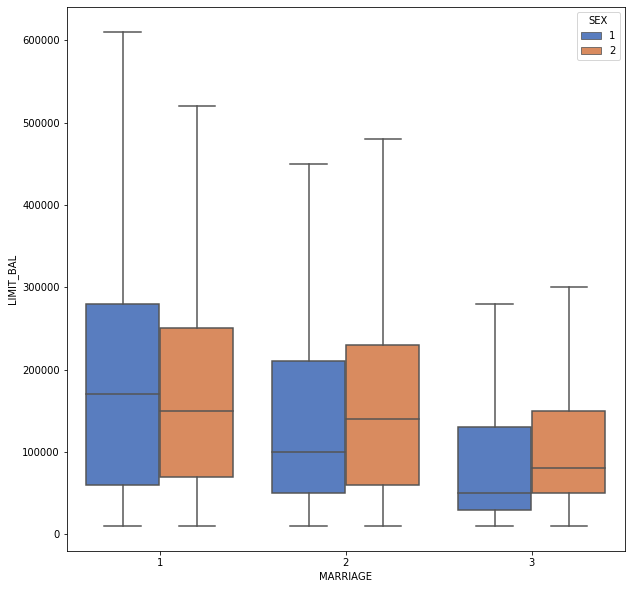

In [20]:
boxplots('MARRIAGE', 'LIMIT_BAL', 'SEX', 10)

<p>Among the married clients, male population has bigger mean than female population. Married population is the only population among Marriage feature that male Q3 is bigger than female ones.<p/>

<p> Married man has the bigger max credit card limit, others (could be divorced or widowed) has the lowest credit card limit. <p/>

__Marriage, Sex vs Age__

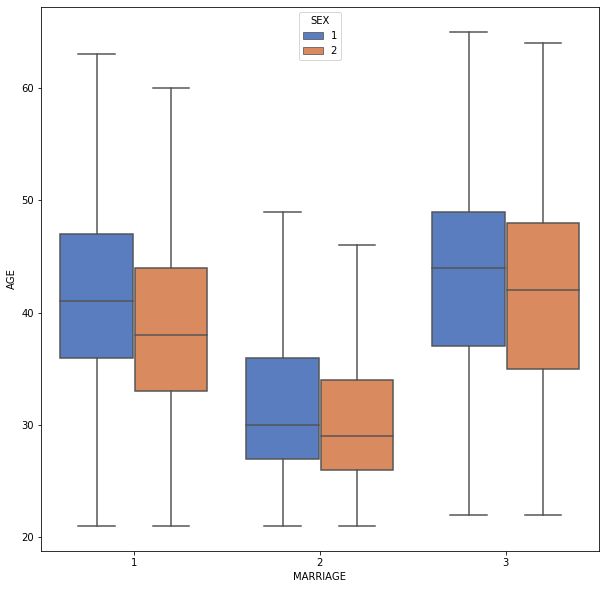

In [21]:
boxplots('MARRIAGE', 'AGE', 'SEX', 10)

<p>Others (could be divorced or widowed) has the higher mean of age as it could be guessed. Single female clients have the lowest mean age.<p/>

<p> In general, female population in all categories has lower mean age. <p/>

__Education, Sex vs Credit Card Limit Balance__

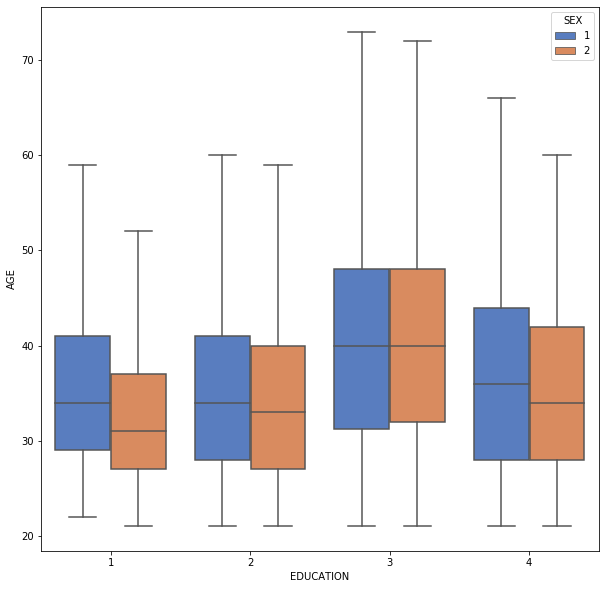

In [22]:
boxplots('EDUCATION', 'AGE', 'SEX', 10)

<p> Lower age mean group is the grad school graduate females, and higher mean group is high school educated clients. Also, high school group has the maximum age.<p/>

__Education, Marriage vs Credit Card Limit Balance__

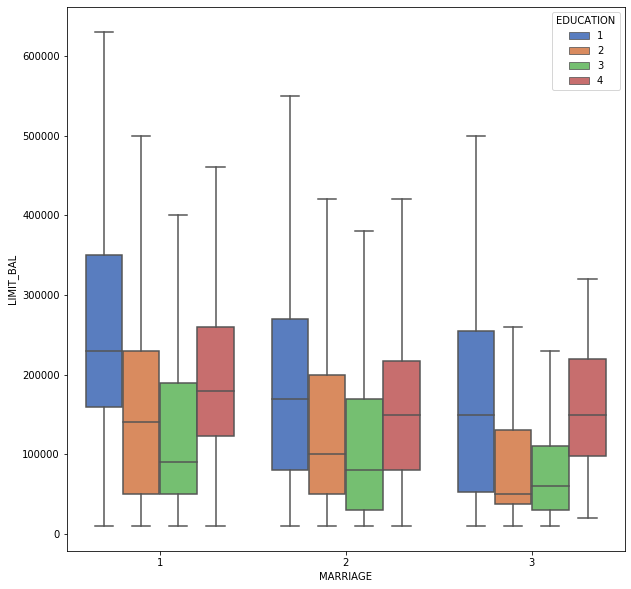

In [23]:
boxplots('MARRIAGE', 'LIMIT_BAL', 'EDUCATION', 10)

__Age, Sex vs Credit Card Limit__

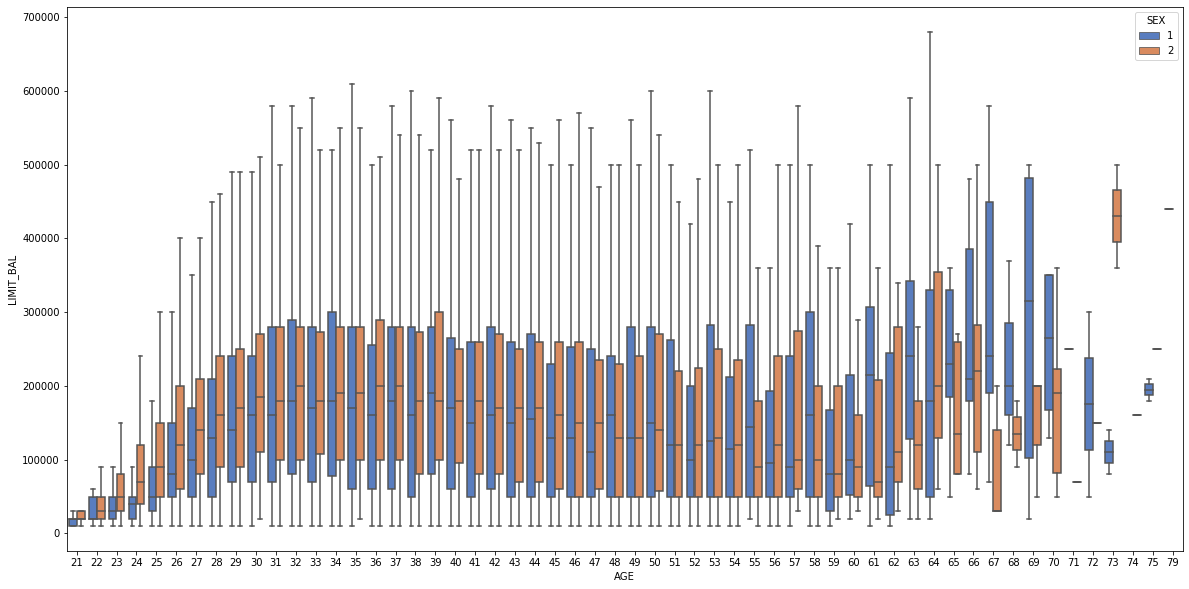

In [24]:
boxplots('AGE', 'LIMIT_BAL', 'SEX', 20)

<p>Credit Card limit balance mean, Q3 and Q4  increases till 32 years of age for both sexes, after 32 it starts decreasing till it increase again at age of 60. <p/>

__Repayment Status Variables__

Repayment status features are documents as below:

(-1=pay duly, 1=payment delay for one month, 2=payment delay for two - months, … 8=payment delay for eight months, 9=payment delay for nine months and above).

However, we can see that there are __-2,-1 and 0__ categories. It would make more sense to combine -2, -1 and 0 together into category 0  for no payment due. Thus, 0 will be pay duly, 1 will be 1 month delay, etc.

In [25]:
# Original Pay_0 value counts.
df.PAY_0.value_counts()

 0    14737
-1     5686
 1     3688
-2     2759
 2     2667
 3      322
 4       76
 5       26
 8       19
 6       11
 7        9
Name: PAY_0, dtype: int64

In [26]:
# Define a function to add -1,-2 into 0

def fullypaid(data, month):
    a = (data[month] == -1) | (data[month] == -2)
    data.loc[a, month] = 0
    return data[month].value_counts()

In [27]:
# Let apply our function to all payment status columns

allpayments = ['PAY_0', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6']

allpayments = [fullypaid(df, allpayment) for allpayment in allpayments]

Now, we can check the correlation between payment status columns.

Text(0.5, 1, 'Correlation between Payment Status Features')

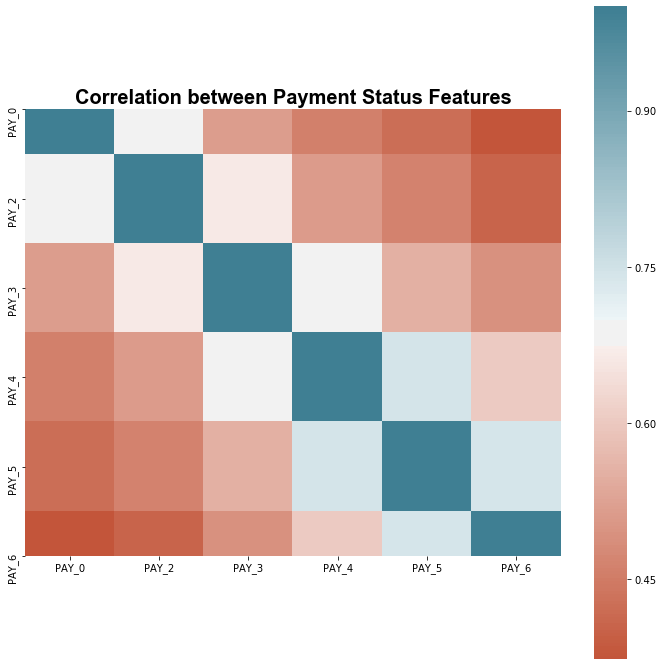

In [28]:
revised_allpayments = ['PAY_0', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6']
font = {'family': 'arial',
        'color':  'black',
        'weight': 'bold',
        'size': 20,
        }

plt.figure(figsize=(12, 12))
corr = df[revised_allpayments].corr()
sns.heatmap(corr,
            cmap=sns.diverging_palette(20, 220, n=200),
            xticklabels=corr.columns,
            yticklabels=corr.columns,
            square=True,
            )
plt.title('Correlation between Payment Status Features', fontdict=font)

Correlation is not strong with features. Correlation descrease with the distance between months. Biggest correlations are between PAY_5 - PAY_4 (May-June) and PAY_6 - PAY_5 (April - May).

We can go on checking the correlation between Amount of bill statement in months:

Text(0.5, 1, 'Correlation between Amount of Bill Statement in Months')

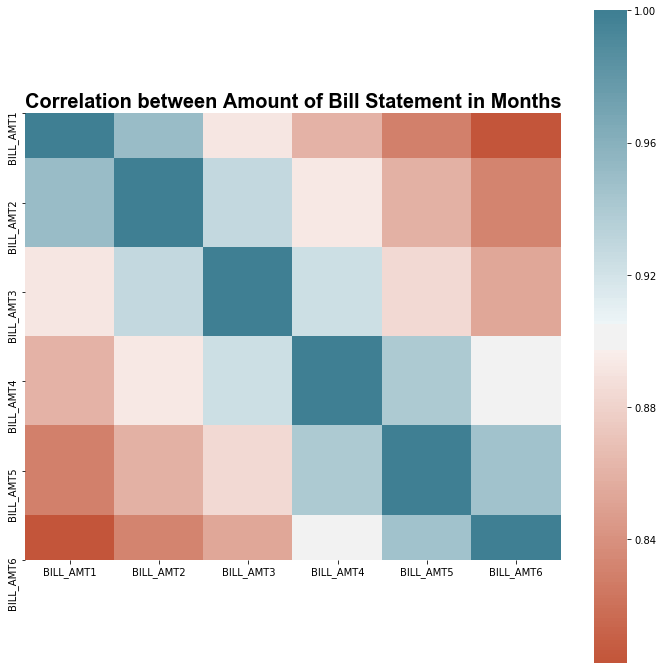

In [29]:
bill_amonths = ['BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3',
                'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6']
font = {'family': 'arial',
        'color':  'black',
        'weight': 'bold',
        'size': 20,
        }

plt.figure(figsize=(12, 12))
corr = df[bill_amonths].corr()
sns.heatmap(corr,
            cmap=sns.diverging_palette(20, 220, n=200),
            xticklabels=corr.columns,
            yticklabels=corr.columns,
            square=True,
            )
plt.title('Correlation between Amount of Bill Statement in Months', fontdict=font)

Strong correlation between consecutive months, correlation decreases between months in distance.

Last, let's check the correlation between the amount of previous payments: 

Text(0.5, 1, 'Correlation between Amount of Previous Payments')

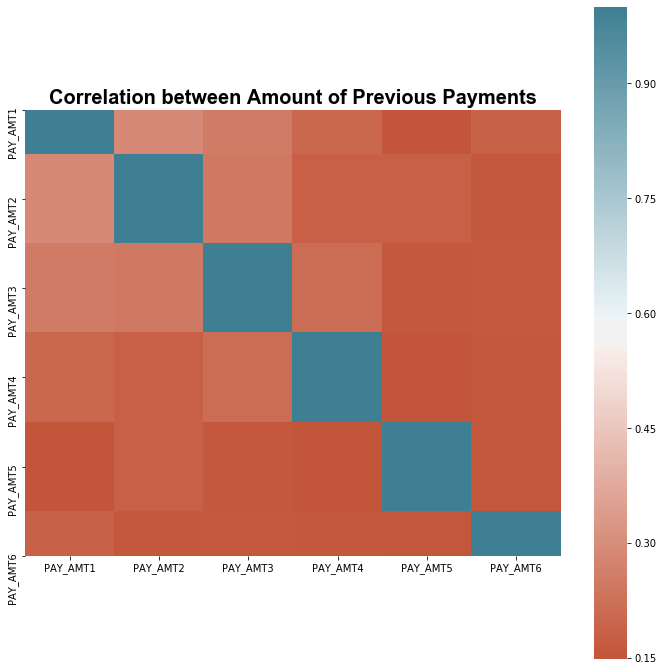

In [30]:
prev_payments = ['PAY_AMT1', 'PAY_AMT2',
                 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6']
font = {'family': 'arial',
        'color':  'black',
        'weight': 'bold',
        'size': 20,
        }

plt.figure(figsize=(12, 12))
corr = df[prev_payments].corr()
sns.heatmap(corr,
            cmap=sns.diverging_palette(20, 220, n=200),
            xticklabels=corr.columns,
            yticklabels=corr.columns,
            square=True,
            )
plt.title('Correlation between Amount of Previous Payments', fontdict=font)

Mostly, there is no correlation between amounts of previous payments. 

# Model Prediction 

Now, we will start building our model to predict whether the client will default the next payment or not by the features we worked on so far. Since the question that we are looking to answer has only two categories (default/non default), we can use binary algorithms such Logistics regression Classifier, Decision Tree Classifier, Random Forest Classifier and Xgboost Classifier. 

__Defining Features and Target Value__

Before jumping the regression models, we need to define our target value and features. Our features will __X__ and our target value will be __y__ as per below:

<p>X = All features expect ID and default.payment.next.month columns (predictors)<p/>

<p> y = default.payment.next.month column (target value)

In [31]:
# Setting up predictor features

X = df.drop(['default.payment.next.month', 'ID'], axis=1)
X.head(5)

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6
0,20000.0,2,2,1,24,2,2,0,0,0,...,689.0,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0
1,120000.0,2,2,2,26,0,2,0,0,0,...,2682.0,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0
2,90000.0,2,2,2,34,0,0,0,0,0,...,13559.0,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0
3,50000.0,2,2,1,37,0,0,0,0,0,...,49291.0,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0
4,50000.0,1,2,1,57,0,0,0,0,0,...,35835.0,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0


In [32]:
# Setting up target value

y = df['default.payment.next.month'].copy()
y.head(5)

0    1
1    1
2    0
3    0
4    0
Name: default.payment.next.month, dtype: int64

__Training and Test Datasets__

We set up our datasets, now we will split our sets into training data and test data. The reason behind is that we would like to build a strong model that predicts well. By splitting our our data into test and training data, we can use cross_validation on our model later.

In [33]:
# importing libraries for spliting data
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=testsize, random_state=randomstate)

## Logistic Regression Classfier

We will start a basic Logistic Regression Classifier on our dataset. When fitting models, we would like to ensure two things:

- We have found the best model (in terms of model parameters).
- The model is highly likely to generalize i.e. perform well on unseen data.

In [34]:
# importing library for Logistic Regression

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
logg = LogisticRegression()

# Fit the model on the trainng data.
logg.fit(X_train, y_train)
# Print the accuracy from the testing data.
print('The accuary score for our model is: {0:.2f}'.format(
    accuracy_score(logg.predict(X_test), y_test)))

/Users/ceyhun/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


The accuary score for our model is: 0.78


Our model predicts the with 78% whether the person will default next payment or not. We will check the feature importance by retrieving the coefficients for each input variable to see which features have more impact on prediction model and how we can tune them to get better accuracy result.

Feature: 0, Score: -0.00000
Feature: 1, Score: -0.00141
Feature: 2, Score: -0.00148
Feature: 3, Score: -0.00157
Feature: 4, Score: -0.01814
Feature: 5, Score: 0.00276
Feature: 6, Score: 0.00213
Feature: 7, Score: 0.00177
Feature: 8, Score: 0.00161
Feature: 9, Score: 0.00146
Feature: 10, Score: 0.00130
Feature: 11, Score: -0.00001
Feature: 12, Score: 0.00000
Feature: 13, Score: 0.00000
Feature: 14, Score: 0.00000
Feature: 15, Score: 0.00000
Feature: 16, Score: 0.00000
Feature: 17, Score: -0.00002
Feature: 18, Score: -0.00002
Feature: 19, Score: -0.00001
Feature: 20, Score: -0.00001
Feature: 21, Score: -0.00001
Feature: 22, Score: -0.00000


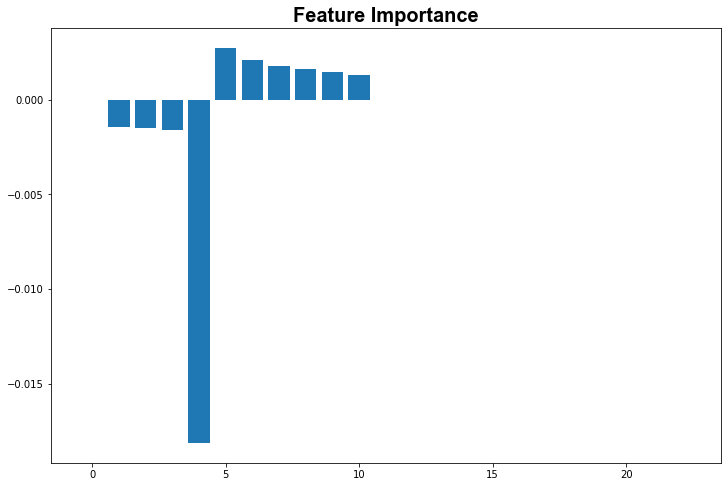

In [35]:
# get importance
importance = logg.coef_[0]

# summarize feature importance
for i, v in enumerate(importance):
    print('Feature: %0d, Score: %.5f' % (i, v))
# plot feature importance
plt.figure(figsize=(12, 8))
plt.bar([x for x in range(len(importance))], importance)
plt.title('Feature Importance', fontdict=font)
plt.show()

We can also check Variance Inflation Factor (VIF) for depended variables (features). VIF detects Colinearity (or Multicolinearity) which variables are very correlated with each other and carry similar information in the dataset. We can check VIF as below:

In [36]:
# importing VIF
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(
    X.values, i) for i in range(X.shape[1])]
vif["features"] = X.columns
vif.round(2)

,VIF Factor,features
0,3.59,LIMIT_BAL
1,9.12,SEX
2,7.38,EDUCATION
3,6.39,MARRIAGE
4,11.29,AGE
5,2.47,PAY_0
6,3.04,PAY_2
7,2.89,PAY_3
8,3.31,PAY_4
9,3.56,PAY_5


By looking at both feature importance and VIF, It seems that most of the BILL_AMT features have high variable inflation factor and they are not important and while making prediction. Therefore, we can remove them from our data to improve our accuracy score.

In [37]:
max_bin = 20
force_bin = 3

# define a binning function


def mono_bin(Y, X, n=max_bin):

    df1 = pd.DataFrame({"X": X, "Y": Y})
    justmiss = df1[['X', 'Y']][df1.X.isnull()]
    notmiss = df1[['X', 'Y']][df1.X.notnull()]
    r = 0
    while np.abs(r) < 1:
        try:
            d1 = pd.DataFrame({"X": notmiss.X, "Y": notmiss.Y,
                               "Bucket": pd.qcut(notmiss.X, n)})
            d2 = d1.groupby('Bucket', as_index=True)
            r, p = stats.spearmanr(d2.mean().X, d2.mean().Y)
            n = n - 1
        except Exception as e:
            n = n - 1

    if len(d2) == 1:
        n = force_bin
        bins = algos.quantile(notmiss.X, np.linspace(0, 1, n))
        if len(np.unique(bins)) == 2:
            bins = np.insert(bins, 0, 1)
            bins[1] = bins[1]-(bins[1]/2)
        d1 = pd.DataFrame({"X": notmiss.X, "Y": notmiss.Y, "Bucket": pd.cut(
            notmiss.X, np.unique(bins), include_lowest=True)})
        d2 = d1.groupby('Bucket', as_index=True)

    d3 = pd.DataFrame({}, index=[])
    d3["MIN_VALUE"] = d2.min().X
    d3["MAX_VALUE"] = d2.max().X
    d3["COUNT"] = d2.count().Y
    d3["EVENT"] = d2.sum().Y
    d3["NONEVENT"] = d2.count().Y - d2.sum().Y
    d3 = d3.reset_index(drop=True)

    if len(justmiss.index) > 0:
        d4 = pd.DataFrame({'MIN_VALUE': np.nan}, index=[0])
        d4["MAX_VALUE"] = np.nan
        d4["COUNT"] = justmiss.count().Y
        d4["EVENT"] = justmiss.sum().Y
        d4["NONEVENT"] = justmiss.count().Y - justmiss.sum().Y
        d3 = d3.append(d4, ignore_index=True)

    d3["EVENT_RATE"] = d3.EVENT/d3.COUNT
    d3["NON_EVENT_RATE"] = d3.NONEVENT/d3.COUNT
    d3["DIST_EVENT"] = d3.EVENT/d3.sum().EVENT
    d3["DIST_NON_EVENT"] = d3.NONEVENT/d3.sum().NONEVENT
    d3["WOE"] = np.log(d3.DIST_EVENT/d3.DIST_NON_EVENT)
    d3["IV"] = (d3.DIST_EVENT-d3.DIST_NON_EVENT) * \
        np.log(d3.DIST_EVENT/d3.DIST_NON_EVENT)
    d3["VAR_NAME"] = "VAR"
    d3 = d3[['VAR_NAME', 'MIN_VALUE', 'MAX_VALUE', 'COUNT', 'EVENT', 'EVENT_RATE',
             'NONEVENT', 'NON_EVENT_RATE', 'DIST_EVENT', 'DIST_NON_EVENT', 'WOE', 'IV']]
    d3 = d3.replace([np.inf, -np.inf], 0)
    d3.IV = d3.IV.sum()

    return(d3)


def char_bin(Y, X):

    df1 = pd.DataFrame({"X": X, "Y": Y})
    justmiss = df1[['X', 'Y']][df1.X.isnull()]
    notmiss = df1[['X', 'Y']][df1.X.notnull()]
    df2 = notmiss.groupby('X', as_index=True)

    d3 = pd.DataFrame({}, index=[])
    d3["COUNT"] = df2.count().Y
    d3["MIN_VALUE"] = df2.sum().Y.index
    d3["MAX_VALUE"] = d3["MIN_VALUE"]
    d3["EVENT"] = df2.sum().Y
    d3["NONEVENT"] = df2.count().Y - df2.sum().Y

    if len(justmiss.index) > 0:
        d4 = pd.DataFrame({'MIN_VALUE': np.nan}, index=[0])
        d4["MAX_VALUE"] = np.nan
        d4["COUNT"] = justmiss.count().Y
        d4["EVENT"] = justmiss.sum().Y
        d4["NONEVENT"] = justmiss.count().Y - justmiss.sum().Y
        d3 = d3.append(d4, ignore_index=True)

    d3["EVENT_RATE"] = d3.EVENT/d3.COUNT
    d3["NON_EVENT_RATE"] = d3.NONEVENT/d3.COUNT
    d3["DIST_EVENT"] = d3.EVENT/d3.sum().EVENT
    d3["DIST_NON_EVENT"] = d3.NONEVENT/d3.sum().NONEVENT
    d3["WOE"] = np.log(d3.DIST_EVENT/d3.DIST_NON_EVENT)
    d3["IV"] = (d3.DIST_EVENT-d3.DIST_NON_EVENT) * \
        np.log(d3.DIST_EVENT/d3.DIST_NON_EVENT)
    d3["VAR_NAME"] = "VAR"
    d3 = d3[['VAR_NAME', 'MIN_VALUE', 'MAX_VALUE', 'COUNT', 'EVENT', 'EVENT_RATE',
             'NONEVENT', 'NON_EVENT_RATE', 'DIST_EVENT', 'DIST_NON_EVENT', 'WOE', 'IV']]
    d3 = d3.replace([np.inf, -np.inf], 0)
    d3.IV = d3.IV.sum()
    d3 = d3.reset_index(drop=True)

    return(d3)


def data_vars(df1, target):

    stack = traceback.extract_stack()
    filename, lineno, function_name, code = stack[-2]
    vars_name = re.compile(r'\((.*?)\).*$').search(code).groups()[0]
    final = (re.findall(r"[\w']+", vars_name))[-1]

    x = df1.dtypes.index
    count = -1

    for i in x:
        if i.upper() not in (final.upper()):
            if np.issubdtype(df1[i], np.number) and len(Series.unique(df1[i])) > 2:
                conv = mono_bin(target, df1[i])
                conv["VAR_NAME"] = i
                count = count + 1
            else:
                conv = char_bin(target, df1[i])
                conv["VAR_NAME"] = i
                count = count + 1

            if count == 0:
                iv_df = conv
            else:
                iv_df = iv_df.append(conv, ignore_index=True)

    iv = pd.DataFrame({'IV': iv_df.groupby('VAR_NAME').IV.max()})
    iv = iv.reset_index()
    return(iv_df, iv)

In [38]:
final_iv, IV = data_vars(X_train, y_train)

In [39]:
features = list(IV[(IV['IV'] >= 0.01) & (IV['IV'] <= 0.8)]['VAR_NAME'])
X2 = X_train[features]

In [40]:
def iterate_vif(df, vif_threshold=5, max_vif=6):
    count = 0
    while max_vif > vif_threshold:
        count += 1
        print("Iteration # "+str(count))
        vif = pd.DataFrame()
        vif["VIFactor"] = [variance_inflation_factor(
            df.values, i) for i in range(df.shape[1])]
        vif["features"] = df.columns

        if vif['VIFactor'].max() > vif_threshold:
            print('Removing %s with VIF of %f' % (vif[vif['VIFactor'] == vif['VIFactor'].max(
            )]['features'].values[0], vif['VIFactor'].max().round(1)))
            df = df.drop(vif[vif['VIFactor'] == vif['VIFactor'].max()]
                         ['features'].values[0], axis=1)
            max_vif = vif['VIFactor'].max().round(1)
        else:
            print('Complete')
            return df, vif.sort_values('VIFactor').round(1)


X1 = X2._get_numeric_data()
final_df, final_vif = iterate_vif(X1)

Iteration # 1
Complete


In [41]:
# assigning X_train and X-test after removing features that have high VIF and not important
X_train = final_df
X_test = X_test[X_train.columns]

__Confusion Matrix__

Now, we can check the results of Logistics Regression Classifier model in confusion matrix.

In [42]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve


def run_regression_accuracy(X_train, y_train, X_test, y_test):
    logreg = LogisticRegression()
    logreg.fit(X_train, y_train)
    y_pred = logreg.predict(X_test)
    print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(
        logreg.score(X_test, y_test)))
    cm = confusion_matrix(y_test, y_pred)
    print('\nConfusion matrix: \n', cm)

    print('\nClassification report: \n', classification_report(y_test, y_pred))

    logit_roc_auc = roc_auc_score(y_test, logreg.predict(X_test))
    fpr, tpr, thresholds = roc_curve(
        y_test, logreg.predict_proba(X_test)[:, 1])

    plt.figure()
    plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' %
             logit_roc_auc)
    plt.plot([0, 1], [0, 1], 'r--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic')
    plt.legend(loc="lower right")
    plt.savefig('Log_ROC')
    plt.show()

    return logreg

/Users/ceyhun/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/ceyhun/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


Accuracy of logistic regression classifier on test set: 0.78

Confusion matrix: 
 [[6978    0]
 [2022    0]]

Classification report: 
               precision    recall  f1-score   support

           0       0.78      1.00      0.87      6978
           1       0.00      0.00      0.00      2022

    accuracy                           0.78      9000
   macro avg       0.39      0.50      0.44      9000
weighted avg       0.60      0.78      0.68      9000



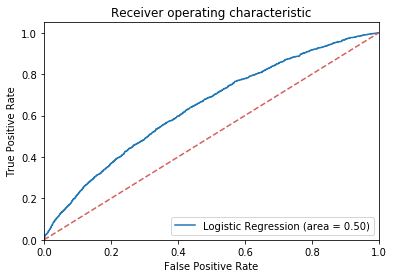

In [43]:
logreg = run_regression_accuracy(X_train, y_train, X_test, y_test)

In [44]:
roc_auc_score(y_test, logreg.predict(X_test))


0.5

__Coefficient Importance__

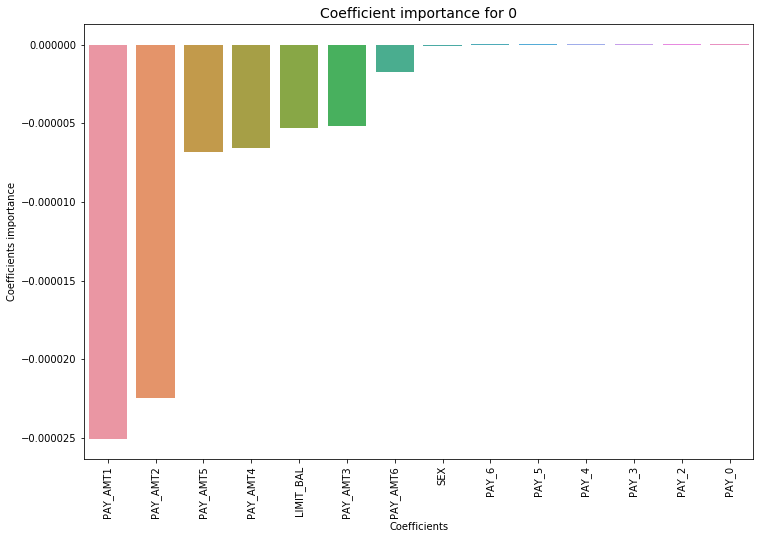

In [76]:
tmp = pd.DataFrame({'Coefficients': X_train.columns, 'Coefficients importance':logreg.coef_[0]})
tmp = tmp.sort_values(by='Coefficients importance')
plt.figure(figsize = (12,8))
plt.title('Coefficient importance for 0',fontsize=14)
s = sns.barplot(x='Coefficients',y='Coefficients importance',data=tmp)
s.set_xticklabels(s.get_xticklabels(),rotation=90)
plt.show() 

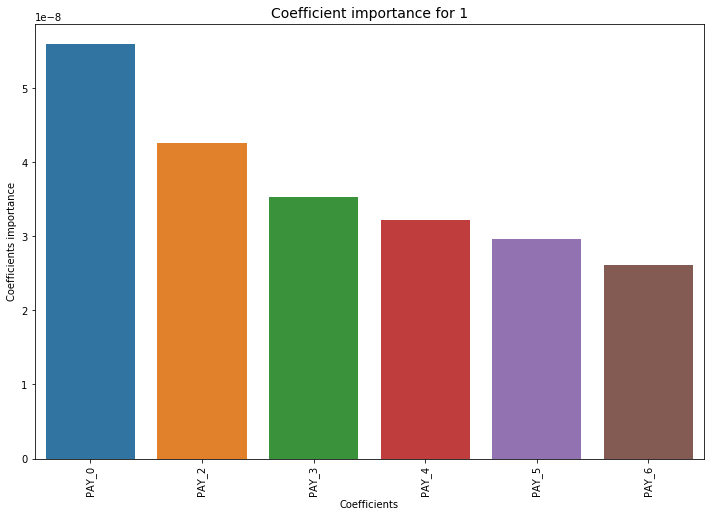

In [77]:
positive = logreg.coef_[0][1:7]
positive_columns = X_train.columns[1:7]

tmp = pd.DataFrame({'Coefficients': positive_columns, 'Coefficients importance':positive})
tmp = tmp.sort_values(by='Coefficients importance', ascending = False)
plt.figure(figsize = (12,8))
plt.title('Coefficient importance for 1',fontsize=14)
s = sns.barplot(x='Coefficients',y='Coefficients importance',data=tmp)
s.set_xticklabels(s.get_xticklabels(),rotation=90)
plt.show()  

## Decision Tree Classifier

We will use Decision Tree Classifier to see if we can get better accuracy score than the one we got from Logistic Regression.

In [47]:
# importing libraries
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, make_scorer
from sklearn.model_selection import train_test_split

In [48]:
dt = DecisionTreeClassifier(max_depth=10, random_state=randomstate)
dt.fit(X_train, y_train)
predictions = dt.predict(X_test)
print('Accuracy score of Decision Tree Model is:%.2f' %
      (accuracy_score(y_true=y_test, y_pred=predictions)))

Accuracy score of Decision Tree Model is:0.81


We already get 3% increase on the accuracy score. We will tune the parameters to see if we can get a better score. We will use __GridSearch__ to test different parameters and apply the best parameters for the model.

In [49]:
from sklearn.model_selection import GridSearchCV

grid = GridSearchCV(DecisionTreeClassifier(),
                    param_grid=param, cv=5, scoring='accuracy')

grid = grid.fit(X_train, y_train)

In [50]:
print(grid.best_params_)

{'criterion': 'gini', 'max_depth': 3, 'max_leaf_nodes': 5, 'min_samples_split': 2}


In [51]:
print(grid.best_score_)

0.8212857142857143


As it seen above, by using the parameters shown, we can increase accuracy score to 82%.

__Feature Importance__

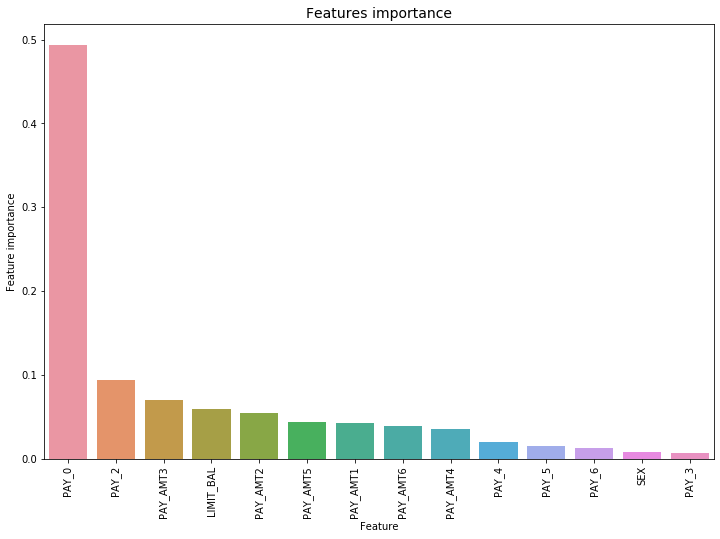

In [52]:
tmp = pd.DataFrame({'Feature': X_train.columns, 'Feature importance': dt.feature_importances_})
tmp = tmp.sort_values(by='Feature importance',ascending=False)
plt.figure(figsize = (12,8))
plt.title('Features importance',fontsize=14)
s = sns.barplot(x='Feature',y='Feature importance',data=tmp)
s.set_xticklabels(s.get_xticklabels(),rotation=90)
plt.show()   

__Confusion Matrix__

Let's see the confusion matrix for our Decision tree model:

In [53]:
def run_regression_accuracy(X_train, y_train, X_test, y_test):
    grid = GridSearchCV(DecisionTreeClassifier(),
                        param_grid=param, cv=5, scoring='accuracy')
    grid.fit(X_train, y_train)
    y_pred = grid.predict(X_test)
    print('Accuracy of Decision Tree classifier on test set: {:.2f}'.format(
        grid.score(X_test, y_test)))
    cm = confusion_matrix(y_test, y_pred)
    print('\nConfusion matrix: \n', cm)

    print('\nClassification report: \n', classification_report(y_test, y_pred))

    logit_roc_auc = roc_auc_score(y_test, grid.predict(X_test))
    fpr, tpr, thresholds = roc_curve(
        y_test, grid.predict_proba(X_test)[:, 1])

    plt.figure()
    plt.plot(fpr, tpr, label='Decision Tree (area = %0.2f)' %
             logit_roc_auc)
    plt.plot([0, 1], [0, 1], 'r--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic')
    plt.legend(loc="lower right")
    plt.savefig('Log_ROC')
    plt.show()

    return grid

Accuracy of Decision Tree classifier on test set: 0.82

Confusion matrix: 
 [[6609  369]
 [1262  760]]

Classification report: 
               precision    recall  f1-score   support

           0       0.84      0.95      0.89      6978
           1       0.67      0.38      0.48      2022

    accuracy                           0.82      9000
   macro avg       0.76      0.66      0.69      9000
weighted avg       0.80      0.82      0.80      9000



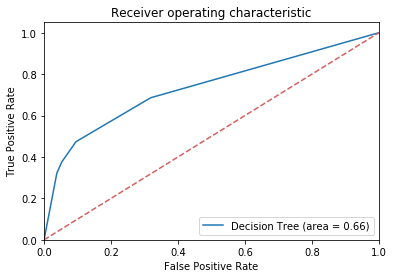

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=DecisionTreeClassifier(class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort=False, random_state=None,
                                              splitter='best'),
             iid='warn', n_jobs=None,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': array([3, 4, 5, 6, 7, 8, 9]),
         

In [54]:
run_regression_accuracy(X_train, y_train, X_test, y_test)

In [55]:
 roc_auc_score(y_test, grid.predict(X_test))

0.6614924991048594

## Random Forest Classifier

We can try random forest classifier for this dataset as well. Let's set our model.

In [56]:
# importing library
from sklearn.ensemble import RandomForestClassifier

In [57]:
# we use criterion as 'gini', number of estimator as 100, number of parallel jobs as 4
rf = RandomForestClassifier(n_jobs=4,
                            random_state=randomstate,
                            criterion='gini',
                            n_estimators=100,
                            verbose=False)

# train the model
rf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=4,
                       oob_score=False, random_state=2020, verbose=False,
                       warm_start=False)

In [58]:
# Predict values
predict = rf.predict(X_test)

__Feature Importance__

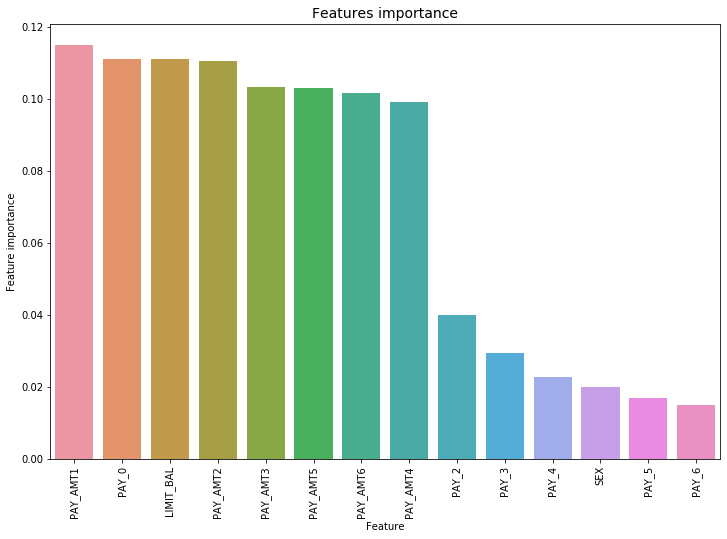

In [59]:
tmp = pd.DataFrame({'Feature': X_train.columns, 'Feature importance': rf.feature_importances_})
tmp = tmp.sort_values(by='Feature importance',ascending=False)
plt.figure(figsize = (12,8))
plt.title('Features importance',fontsize=14)
s = sns.barplot(x='Feature',y='Feature importance',data=tmp)
s.set_xticklabels(s.get_xticklabels(),rotation=90)
plt.show()   

__Confusion Matrix__

In [60]:
def run_regression_accuracy(X_train, y_train, X_test, y_test):
    rf = RandomForestClassifier(n_jobs=4,
                                random_state=randomstate,
                                criterion='gini',
                                n_estimators=100,
                                verbose=False)
    rf.fit(X_train, y_train)
    y_pred = rf.predict(X_test)
    print('Accuracy of Random Forest classifier on test set: {:.2f}'.format(
        rf.score(X_test, y_test)))
    cm = confusion_matrix(y_test, y_pred)
    print('\nConfusion matrix: \n', cm)

    print('\nClassification report: \n', classification_report(y_test, y_pred))

    logit_roc_auc = roc_auc_score(y_test, rf.predict(X_test))
    fpr, tpr, thresholds = roc_curve(
        y_test, rf.predict_proba(X_test)[:, 1])

    plt.figure()
    plt.plot(fpr, tpr, label='Random Forest (area = %0.2f)' %
             logit_roc_auc)
    plt.plot([0, 1], [0, 1], 'r--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic')
    plt.legend(loc="lower right")
    plt.savefig('Log_ROC')
    plt.show()

    return rf

Accuracy of Random Forest classifier on test set: 0.81

Confusion matrix: 
 [[6599  379]
 [1296  726]]

Classification report: 
               precision    recall  f1-score   support

           0       0.84      0.95      0.89      6978
           1       0.66      0.36      0.46      2022

    accuracy                           0.81      9000
   macro avg       0.75      0.65      0.68      9000
weighted avg       0.80      0.81      0.79      9000



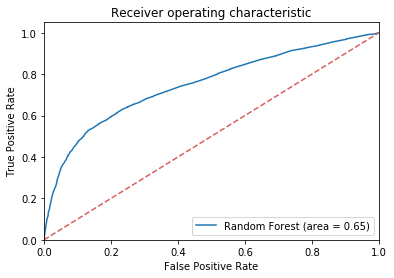

In [61]:
rf = run_regression_accuracy(X_train, y_train, X_test, y_test)

In [62]:
 roc_auc_score(y_test, rf.predict(X_test))

0.6523684441053825

## XGBoost Classifier

In [63]:
# import XGBoost library
from xgboost import XGBClassifier
import xgboost as xgb

Let's try Xgboost classifier,let's set our model.

In [64]:
xg = XGBClassifier()

In [65]:
xg.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=0, num_parallel_tree=1,
              objective='binary:logistic', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

__Feature Importance__

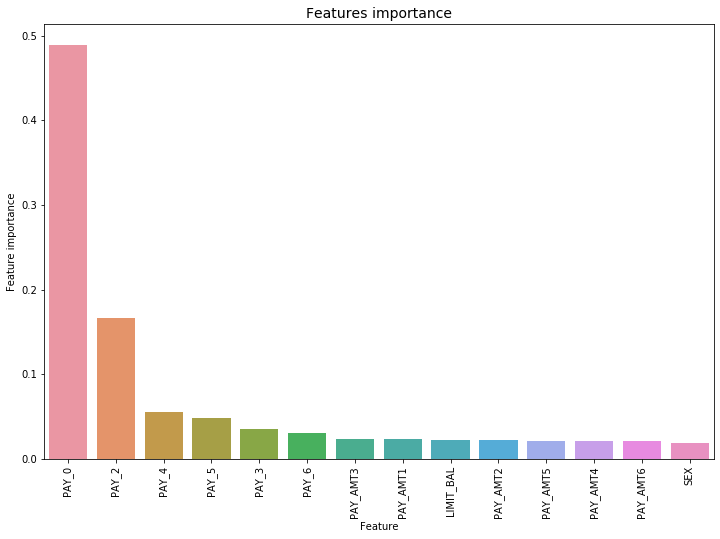

In [66]:
tmp = pd.DataFrame({'Feature': X_train.columns, 'Feature importance': xg.feature_importances_})
tmp = tmp.sort_values(by='Feature importance',ascending=False)
plt.figure(figsize = (12,8))
plt.title('Features importance',fontsize=14)
s = sns.barplot(x='Feature',y='Feature importance',data=tmp)
s.set_xticklabels(s.get_xticklabels(),rotation=90)
plt.show()   

__Confusion Matrix__

In [67]:
def run_regression_accuracy(X_train, y_train, X_test, y_test):
    xg = XGBClassifier()
    xg.fit(X_train, y_train)
    y_pred = xg.predict(X_test)
    print('Accuracy of XGBoost on test set: {:.2f}'.format(
        xg.score(X_test, y_test)))
    cm = confusion_matrix(y_test, y_pred)
    print('\nConfusion matrix: \n', cm)

    print('\nClassification report: \n', classification_report(y_test, y_pred))

    logit_roc_auc = roc_auc_score(y_test, xg.predict(X_test))
    fpr, tpr, thresholds = roc_curve(
        y_test, xg.predict_proba(X_test)[:, 1])

    plt.figure()
    plt.plot(fpr, tpr, label='XGBoost (area = %0.2f)' %
             logit_roc_auc)
    plt.plot([0, 1], [0, 1], 'r--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic')
    plt.legend(loc="lower right")
    plt.savefig('Log_ROC')
    plt.show()

    return xg

Accuracy of XGBoost on test set: 0.81

Confusion matrix: 
 [[6616  362]
 [1309  713]]

Classification report: 
               precision    recall  f1-score   support

           0       0.83      0.95      0.89      6978
           1       0.66      0.35      0.46      2022

    accuracy                           0.81      9000
   macro avg       0.75      0.65      0.67      9000
weighted avg       0.80      0.81      0.79      9000



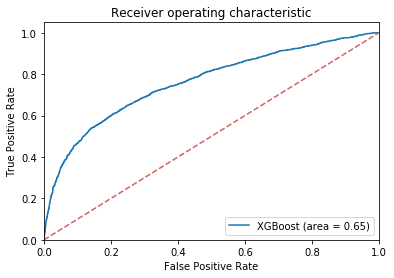

In [68]:
xg = run_regression_accuracy(X_train, y_train, X_test, y_test)

In [69]:
 roc_auc_score(y_test, xg.predict(X_test))

0.6503719192068672

# Conclution

<p>We cleaned the data, looked for correlation between the predictor variables and four three different models to predict if the person will default the next credit card payment or not.<p/>
<p>Logistic Regression Classifier has 0.50 AUC score. <p>
<p>Decision Tree Classifier has 0.66 AUC score. <p>
<p>Random Forest Classifier has 0.65 AUC score. <p>    
<p>XGBoost Classifier has 0.65 AUC score. <p>    